In [1]:
import pandas as pd
import numpy as np 

In [2]:
#loading the dataset
data = pd.read_csv("fruits_weights_size.csv")
data

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,lemon
2,65,4.09,mango
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,mango
7,75,5.11,apple
8,74,5.36,grapes
9,65,4.27,orange


In [3]:
data.shape

(40, 3)

In [4]:
#Splitting the dataset into training and test samples

from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)



In [5]:
#Classifying the predictors and target

X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [6]:
#Initializing Support Vector Machine and fitting the training data

from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.6, random_state = 1)
classifier.fit(X_train,Y_train)

SVC(gamma=0.6, random_state=1)

In [7]:
#Predicting the classes for test set

Y_pred = classifier.predict(X_test)


In [8]:
#Attaching the predictions to test set for comparing

test_set["Predictions"] = Y_pred
test_set

<ipython-input-8-ef03157c9822>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


,Weight,Size,Class,Predictions
2,65,4.09,mango,orange
31,66,4.68,mango,orange
3,72,5.85,apple,apple
21,70,4.83,orange,mango
27,70,4.22,orange,orange
29,71,5.26,lemon,apple
22,69,4.61,orange,orange
39,73,5.03,lemon,apple


In [9]:
#8 predictions have gone wrong
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(metrics.classification_report(Y_test,Y_pred))
accuracy = float(cm.diagonal().sum())/len(Y_test)

[[1 0 0 0]
 [2 0 0 0]
 [0 0 0 2]
 [0 0 1 2]]
              precision    recall  f1-score   support

       apple       0.33      1.00      0.50         1
       lemon       0.00      0.00      0.00         2
       mango       0.00      0.00      0.00         2
      orange       0.50      0.67      0.57         3

    accuracy                           0.38         8
   macro avg       0.21      0.42      0.27         8
weighted avg       0.23      0.38      0.28         8



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
#calculate the accuracy using the confusion matrix as follows :

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.375


In [11]:
#Visualizing the classifier
#Before we visualize we might need to encode
#We can achieve that using the label encoder.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [12]:
#After encoding , fit the encoded data to the SVM

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(X_train,Y_train)


SVC(kernel='linear', random_state=1)

In [14]:
Y_pred = classifier.predict(X_test)

In [15]:
test_set["Predictions"] = Y_pred
test_set

<ipython-input-15-ecd505e49c04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


,Weight,Size,Class,Predictions
2,65,4.09,mango,4
31,66,4.68,mango,4
3,72,5.85,apple,0
21,70,4.83,orange,1
27,70,4.22,orange,4
29,71,5.26,lemon,0
22,69,4.61,orange,4
39,73,5.03,lemon,0


In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

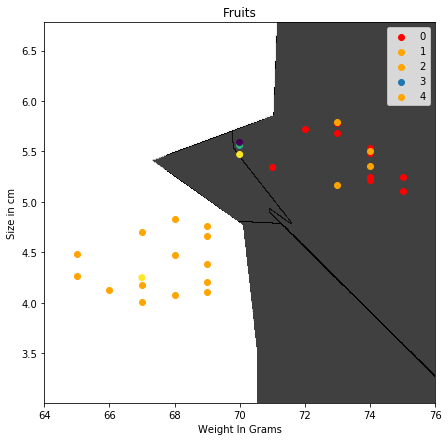

In [13]:
#visualizing the classifier

plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Fruits')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

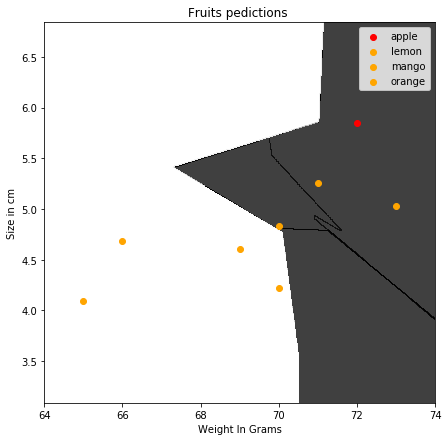

In [14]:
#visualizing the predictions
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Fruits pedictions ')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()